# Machine Learning

## 1) Creando Set de Entrenamiento

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import category_encoders as ce
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from math import radians, cos, sin, asin, sqrt

%matplotlib inline
plt.style.use('default')

In [2]:
#Capitales de los Estados de México
capitales=['Aguascalientes','Mexicali','La Paz','Campeche','Tuxtla Gutiérrez','Chihuahua','Saltillo','Colima','Durango','Guanajuato','Chilpancingo de los Bravo','Pachuca','Guadalajara','Toluca','Morelia','Cuernavaca','Tepic','Monterrey','Oaxaca de Juárez','Puebla','Querétaro','Chetumal','San Luis Potosí','Culiacán','Hermosillo','Villahermosa','Victoria','Tlaxcala','Xalapa','Mérida','Zacatecas','Cuauhtémoc']

In [3]:
zona_metropolitana_valle=['Azcapotzalco','Coyoacán','Cuajimalpa de Morelos','Gustavo A. Madero','Iztacalco','Iztapalapa','La Magdalena Contreras','Milpa Alta','Alvaro Obregón','Tláhuac','Tlalpan','Xochimilco','Benito Juárez','Cuauhtémoc','Miguel Hidalgo','Venustiano Carranza','Tizayuca','Acolman','Amecameca','Atenco','Atizapán de Zaragoza','Atlautla','Axapusco','Ayapango','Coacalco de Berriozábal','Cocotitlán','Coyotepec','Cuautitlán','Chalco','Chiautla','Chicoloapan','Chiconcuac','Chimalhuacán','Ecatepec de Morelos','Ecatzingo','Huehuetoca','Huixquilucan','Isidro Fabela','Ixtapaluca','Jaltenco','Jilotzingo','Melchor Ocampo','Naucalpan de Juárez','Nezahualcóyotl','Nextlalpan','Nicolás Romero','Nopaltepec','Otumba','Ozumba','Papalotla','La Paz','San Martín de las Pirámides','Tecámac','Temamatla','Temascalapa','Tenango del Aire','Teoloyucan','Teotihuacán','Tepetlaoxtoc','Tepetlixpa','Tepotzotlán','Tequixquiac','Texcoco','Tezoyuca','Tlalmanalco','Tlalnepantla de Baz','Tultepec','Tultitlán','Villa del Carbón','Zumpango','Cuautitlán Izcalli','Valle de Chalco Solidaridad','Tonanitla']
zona_metropolitana_guadalajara=['Guadalajara','Zapopan','Tlaquepaque','Tlajomulco de Zúñiga','Tonalá','El Salto','Zapotlanejo','Ixtlahuacán de los Membrillos','Juanacatlán','Juanacatlán']
zona_metropolitana_monterrey=['San Pedro Garza García','San Nicolás de los Garza','Monterrey','Santiago','Guadalupe','Apodaca','Cadereyta Jiménez','Santa Catarina','Gral. Escobedo','García','Juárez','Salinas Victoria']
zona_metropolitana_puebla_texaca=['Amozoc','Coronango','Cuautlancingo','Huejotzingo','Juan C. Bonilla','Ocoyucan','Puebla','San Andrés Cholula','San Gregorio Atzompa','San Martín Texmelucan','San Miguel Xoxtla','San Pedro Cholula','San Salvador el Verde','Tepatlaxco de Hidalgo','Tlaltenango','Ixtacuixtla de Mariano Matamoros','Tepetitla de Lardizábal','Natívitas','San Pablo del Monte','Tenancingo','Teolocholco','Tepeyanco','Tetlatlahuca','Papalotla de Xicohténcatl','Xicohtzinco','Zacatelco','Zacualpan','Santa Ana Nopalucan','Teacalco','Santa Catarina']
zona_metropolitana_toluca=['Toluca','Metepec','Zinacantepec','Almoloya de Juárez','Lerma','Otzolotepec','San Mateo Atenco','Ocoyoacac','Calimaya','Xonacatlán','Tenango del Valle','San Antonio la Isla','Mexicaltzingo','Chapultepec']
zona_metropolitana_laguna=['Torreón','Gómez Palacio','Lerdo','Matamoros']
zona_metropolitana_queretaro=['Querétaro','Corregidora','El Marqués','Huimilpan','Apaseo el Alto']
corona_regional=['Distrito Federal','Edo. de México','Hidalgo','Puebla','Tlaxcala','Morelos']

In [4]:
cuidades_turisticas=['Cancún','Guadalajara','Puerto Vallarta','Acapulco de Juárez','Monterrey','Bahía de Banderas','Mazatlán','Puebla','Veracruz','Mérida','Querétaro','León','Zihuatanejo de Azueta','San Luis Potosí','Cozumel','Villahermosa','Tijuana','Oaxaca de Juárez','Aguascalientes','Santa María Huatulco','Juárez','Chihuahua','Morelia','Manzanillo','Hermosillo','Toluca','Zacatecas','Tuxtla Gutiérrez','Mexicali','Celaya','Guanajuato','Culiacán']

In [5]:
data={'provincia':['Baja California Sur','Baja California Norte','Chihuahua','Durango','Sinaloa','Sonora','Coahuila','Nuevo León','Tamaulipas','Nayarit','Jalisco','Colima','Michoacán','Puebla','Veracruz','Tlaxcala','Hidalgo','Aguascalientes','Guanajuato','San luis Potosí','Zacatecas','Querétaro','Morelos','Edo. de México','Distrito Federal','Guerrero','Oaxaca','Chiapas','Tabasco','Campeche','Quintana Roo','Yucatán'], 'Zona':['nor_oeste','nor_oeste','nor_oeste','nor_oeste','nor_oeste','nor_oeste','nor_este','nor_este','nor_este','occidente','occidente','occidente','occidente','oriente','oriente','oriente','oriente','centro_norte','centro_norte','centro_norte','centro_norte','centro_norte','centro_sur','centro_sur','centro_sur','sur_oeste','sur_oeste','sur_oeste','sur_este','sur_este','sur_este','sur_este']}

In [6]:
zonas_df=pd.DataFrame(data)
zonas_df.head()

,Zona,provincia
0,nor_oeste,Baja California Sur
1,nor_oeste,Baja California Norte
2,nor_oeste,Chihuahua
3,nor_oeste,Durango
4,nor_oeste,Sinaloa


In [7]:
data_centros={'centro_comercial':['Perisur','Parque Tezontle','Las Américas Cancún','Antea LifeStyle Center','Andarés','Plaza Satélite','Forum Buenavista','Multiplaza Aragón','Toreo Parque Central','Centro SantaFe'],'ciudad':['Coyoacán','Iztapalapa','Cancún','Querétaro','Zapopan','Naucalpan de Juárez','Cuauhtémoc','Ecatepec de Morelos','Naucalpan de Juárez','Cuajimalpa de Morelos'],'provincia':['Distrito Federal','Distrito Federal','Quintana Roo','Querétaro','Jalisco','Edo. de México','Distrito Federal','Edo. de México','Edo. de México','Distrito Federal'],'lat':[19.303899,19.38366,21.147655,20.674103,20.710305,19.510331,19.449796,19.530644,19.454400,19.360861],'lng':[-99.189435,-99.082329,-86.823800,-100.435181,-103.412591,-99.235556,-99.151794,-99.028458,-99.218174,-99.272838]}
centros_comerciales_df=pd.DataFrame(data_centros)
centros_comerciales_df

,centro_comercial,ciudad,lat,lng,provincia
0,Perisur,Coyoacán,19.303899,-99.189435,Distrito Federal
1,Parque Tezontle,Iztapalapa,19.383660,-99.082329,Distrito Federal
2,Las Américas Cancún,Cancún,21.147655,-86.823800,Quintana Roo
3,Antea LifeStyle Center,Querétaro,20.674103,-100.435181,Querétaro
4,Andarés,Zapopan,20.710305,-103.412591,Jalisco
5,Plaza Satélite,Naucalpan de Juárez,19.510331,-99.235556,Edo. de México
6,Forum Buenavista,Cuauhtémoc,19.449796,-99.151794,Distrito Federal
7,Multiplaza Aragón,Ecatepec de Morelos,19.530644,-99.028458,Edo. de México
8,Toreo Parque Central,Naucalpan de Juárez,19.454400,-99.218174,Edo. de México
9,Centro SantaFe,Cuajimalpa de Morelos,19.360861,-99.272838,Distrito Federal


In [8]:
def haversine(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r

In [9]:
def CercaniaCentrosImportantes(lng,lat,CentrosComercialesCercanos):
    cantidad_centros_importantes=0
    if(CentrosComercialesCercanos==1):
        for fila in centros_comerciales_df.iterrows():
            if(haversine(lng,lat,fila[1][3],fila[1][2])<10):
                cantidad_centros_importantes=cantidad_centros_importantes+1
    return cantidad_centros_importantes          

In [10]:
#Función que establece si una ciudad se encuentra en la capital del estado
def EstaEnCapital(Ciudad):
    for capital in capitales:
        if(Ciudad==capital):
            return 1
    return 0

In [11]:
#Función que establece si una ciudad se encuentra en la zona metropolitana
def EnQueZonaMetropolitanaEsta(Ciudad,Provincia):
    if(Provincia=='Tijuana'):
        return 'Tijuana'
    for ciudad_metropolitana in zona_metropolitana_valle:
        if(Ciudad==ciudad_metropolitana):
            return 'Valle'
    for ciudad_metropolitana in zona_metropolitana_guadalajara:
        if(Ciudad==ciudad_metropolitana):
            return 'Guadalajara'
    for ciudad_metropolitana in zona_metropolitana_monterrey:
        if(Ciudad==ciudad_metropolitana):
            return 'Monterrey'
    for ciudad_metropolitana in zona_metropolitana_puebla_texaca:
        if(Ciudad==ciudad_metropolitana):
            return 'Puebla_Texaca'
    for ciudad_metropolitana in zona_metropolitana_toluca:
        if(Ciudad==ciudad_metropolitana):
            return 'Toluca'
    for ciudad_metropolitana in zona_metropolitana_laguna:
        if(Ciudad==ciudad_metropolitana):
            return 'Laguna'
    for ciudad_metropolitana in zona_metropolitana_queretaro:
        if(Ciudad==ciudad_metropolitana):
            return 'Queretaro'
    return 'No_Esta'

In [12]:
def EstaCoronaRegional(Provincia):
    for provincia_corona in corona_regional:
        if(Provincia==provincia_corona):
            return 1
    return 0

In [13]:
#Función que establece si una ciudad se encuentra en la zona turistica
def EstaEnZonaTuristica(Ciudad,Provincia):
    if(Provincia=='Distrito Federal'):
        return 1
    for ciudad_turistica in cuidades_turisticas:
        if(Ciudad==ciudad_turistica):
            return 1
    return 0

In [14]:
def EstaProvinciaCara(Provincia):
    for provincia_cara in top_provincias_caras:
        if(Provincia==provincia_cara):
            return 1
    return 0  

In [15]:
def EstaCiudadCara(Ciudad):
    for ciudad_cara in top_ciudades_caras:
        if(Ciudad==ciudad_cara):
            return 1
    return 0    

In [16]:
def oneHotEncoding(df, columna):
    one_hot = pd.get_dummies(df[columna])
    df.drop(columna, axis=1, inplace=True)
    df = pd.concat([df, one_hot], axis=1)
    return df

In [17]:
#Creamos una función que según el mes y el dia, nos devuelve en que estación se encuentra
def fechaEstacion(mes,dia):
    if((mes==1) | (mes==2)):
        return 'Invierno'
    if(mes==3):
        if(dia<21):
            return 'Invierno'
        if(dia>=21):
            return 'Primavera'
    if((mes==4) | (mes==5)):
        return 'Primavera'
    if(mes==6):
        if(dia<21):
            return 'Primavera'
        if(dia>=21):
            return 'Verano'
    if((mes==7) | (mes==8)):
        return 'Verano'
    if(mes==9):
        if(dia<21):
            return 'Verano'
        if(dia>=21):
            return 'Otonio'
    if((mes==10) | (mes==11)):
        return 'Otonio'
    if(mes==12):
        if(dia<21):
            return 'Otonio'
        if(dia>=21):
            return 'Invierno'

In [18]:
#Por cada provincia devuelvo la latitud promedio
def CambiarLatitud(provincia):
     if(provincia=='Distrito Federal'):
        return distrito['lat'].mean()
     if(provincia=='Edo. de México'):
        return estado['lat'].mean()
     if(provincia=='Jalisco'):
        return jalisco['lat'].mean()
     if(provincia=='Querétaro'):
        return queretaro['lat'].mean()
     if(provincia=='Nuevo León'):
        return nuevo_leon['lat'].mean()
     if(provincia=='Puebla'):
        return puebla['lat'].mean()
     if(provincia=='San luis Potosí'):
        return san_luis['lat'].mean()
     if(provincia=='Yucatán'):
        return yucatan['lat'].mean()
     if(provincia=='Morelos'):
        return morelos['lat'].mean()
     if(provincia=='Veracruz'):
        return veracruz['lat'].mean()
     if(provincia=='Quintana Roo'):
        return quintara_roo['lat'].mean()
     if(provincia=='Chihuahua'):
        return chihuahua['lat'].mean()
     if(provincia=='Coahuila'):
        return coahuila['lat'].mean()
     if(provincia=='Baja California Norte'):
        return baja_california_norte['lat'].mean()
     if(provincia=='Baja California Sur'):
        return baja_california_sur['lat'].mean()
     if(provincia=='Sonora'):
        return sonora['lat'].mean()
     if(provincia=='Guanajuato'):
        return guanajuato['lat'].mean()
     if(provincia=='Guerrero'):
        return guerrero['lat'].mean()
     if(provincia=='Hidalgo'):
        return hidalgo['lat'].mean()
     if(provincia=='Michoacán'):
        return michoacan['lat'].mean()
     if(provincia=='Tamaulipas'):
        return tamaulipas['lat'].mean()
     if(provincia=='Durango'):
        return durango['lat'].mean()
     if(provincia=='Sinaloa'):
        return sinaloa['lat'].mean()
     if(provincia=='Aguascalientes'):
        return aguascalientes['lat'].mean()
     if(provincia=='Nayarit'):
        return nayarit['lat'].mean()
     if(provincia=='Chiapas'):
        return chiapas['lat'].mean()
     if(provincia=='Colima'):
        return colima['lat'].mean()
     if(provincia=='Tabasco'):
        return tabasco['lat'].mean()
     if(provincia=='Tlaxcala'):
        return tlaxcala['lat'].mean()
     if(provincia=='Oaxaca'):
        return oaxaca['lat'].mean()
     if(provincia=='Campeche'):
        return campeche['lat'].mean()
     if(provincia=='Zacatecas'):
        return zacatecas['lat'].mean()
     if(provincia==''):
        return 0

In [19]:
#Por cada provincia devuelvo la longitud promedio
def CambiarLongitud(provincia):
     if(provincia=='Distrito Federal'):
        return distrito['lng'].mean()
     if(provincia=='Edo. de México'):
        return estado['lng'].mean()
     if(provincia=='Jalisco'):
        return jalisco['lng'].mean()
     if(provincia=='Querétaro'):
        return queretaro['lng'].mean()
     if(provincia=='Nuevo León'):
        return nuevo_leon['lng'].mean()
     if(provincia=='Puebla'):
        return puebla['lng'].mean()
     if(provincia=='San luis Potosí'):
        return san_luis['lng'].mean()
     if(provincia=='Yucatán'):
        return yucatan['lng'].mean()
     if(provincia=='Morelos'):
        return morelos['lng'].mean()
     if(provincia=='Veracruz'):
        return veracruz['lng'].mean()
     if(provincia=='Quintana Roo'):
        return quintara_roo['lng'].mean()
     if(provincia=='Chihuahua'):
        return chihuahua['lng'].mean()
     if(provincia=='Coahuila'):
        return coahuila['lng'].mean()
     if(provincia=='Baja California Norte'):
        return baja_california_norte['lng'].mean()
     if(provincia=='Baja California Sur'):
        return baja_california_sur['lng'].mean()
     if(provincia=='Sonora'):
        return sonora['lng'].mean()
     if(provincia=='Guanajuato'):
        return guanajuato['lng'].mean()
     if(provincia=='Guerrero'):
        return guerrero['lng'].mean()
     if(provincia=='Hidalgo'):
        return hidalgo['lng'].mean()
     if(provincia=='Michoacán'):
        return michoacan['lng'].mean()
     if(provincia=='Tamaulipas'):
        return tamaulipas['lng'].mean()
     if(provincia=='Durango'):
        return durango['lng'].mean()
     if(provincia=='Sinaloa'):
        return sinaloa['lng'].mean()
     if(provincia=='Aguascalientes'):
        return aguascalientes['lng'].mean()
     if(provincia=='Nayarit'):
        return nayarit['lng'].mean()
     if(provincia=='Chiapas'):
        return chiapas['lng'].mean()
     if(provincia=='Colima'):
        return colima['lng'].mean()
     if(provincia=='Tabasco'):
        return tabasco['lng'].mean()
     if(provincia=='Tlaxcala'):
        return tlaxcala['lng'].mean()
     if(provincia=='Oaxaca'):
        return oaxaca['lng'].mean()
     if(provincia=='Campeche'):
        return campeche['lng'].mean()
     if(provincia=='Zacatecas'):
        return zacatecas['lng'].mean()
     if(provincia==''):
        return 0

In [20]:
train=pd.read_csv('train.csv')
#Hacemos la conversión de fechas
train['Fecha']=pd.to_datetime(train['fecha'])
train.drop(columns={'fecha'},inplace=True)
train['Anio']=train['Fecha'].dt.year
train['Mes']=train['Fecha'].dt.month
train['Dia']=train['Fecha'].dt.day
train['Estacion']=train.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Fecha,Anio,Mes,Dia,Estacion
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0.0,0.0,0.0,0.0,2273000.0,2015-08-23,2015,8,23,Verano
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0.0,0.0,1.0,1.0,3600000.0,2013-06-28,2013,6,28,Verano
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,0.0,0.0,0.0,0.0,1200000.0,2015-10-17,2015,10,17,Otonio
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,0.0,0.0,1.0,1.0,650000.0,2012-03-09,2012,3,9,Invierno
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1150000.0,2016-06-07,2016,6,7,Primavera


In [21]:
precio_promedio_provincia=train.groupby(['provincia']).agg({'precio':'mean'}).sort_values(by='precio',ascending=False)
precio_promedio_provincia.rename(columns={'precio':'precio_promedio_provincia'},inplace=True)
top_provincias_caras=precio_promedio_provincia.head(10).index

In [22]:
train['Esta_Capital']=train['ciudad'].apply(EstaEnCapital)
train['Esta_Provincia_Cara']=train['provincia'].apply(EstaProvinciaCara)
train['Estacion']=train.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)
train['Esta_Zona_Turistica']=train.apply(lambda x: EstaEnZonaTuristica(x['ciudad'],x['provincia']),axis=1)
train['Zona_Metropolitana']=train.apply(lambda x: EnQueZonaMetropolitanaEsta(x['ciudad'],x['provincia']),axis=1)
train['Corona_Regional']=train['provincia'].apply(EstaCoronaRegional)
train['Cantidad_Centros_Cercanos']=train.apply(lambda x: CercaniaCentrosImportantes(x['lng'],x['lat'],x['centroscomercialescercanos']),axis=1)

In [23]:
target_enc = ce.TargetEncoder(train['ciudad'])

# Fit the encoder using the categorical features and target
target_enc.fit(train['ciudad'], train['precio'])

# Transform the features, rename the columns with _target suffix, and join to dataframe
train = train.join(target_enc.transform(train['ciudad']).add_suffix('_target'))

train = train.drop('ciudad', axis=1)

In [24]:
trainAux = train.copy()
trainAux.dropna(subset=["titulo"],inplace=True)

titulos = trainAux["titulo"]
del trainAux

In [25]:
spanish_stopwords = stopwords.words('spanish')
stemmer = SnowballStemmer('spanish')

tipos = ['casa','apartamento','condominio','terreno','local','oficina','bodega','edificio','comercial','quinta','duplex','rancho','departamento','nave','industrial','lote','hospedaje','garage','venta','vende','mexico','dept','departamento','Casa','dept.','departamentos','Mexico','vendo','depto','depto.']
spanish_stopwords.extend(tipos)

In [26]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [27]:
palabras=[]
for row in titulos:
    row =row.lower()
    row=filter(None, re.split("[, \-!?:._¡¿'`<>;()+]", row))
    for palabra in row:
        if len(palabra)<4: #saco conectores
            continue
        if palabra not in spanish_stopwords:
            palabras.append(palabra)

In [28]:
stems = stem_tokens(palabras, stemmer)
contador = Counter(stems)
palabrasComunes = contador.most_common(60)

In [29]:
columnas_nuevas = []
for elemento in palabrasComunes:
    columnas_nuevas.append(elemento[0])

In [30]:
del titulos
del palabras
del contador
del palabrasComunes

In [31]:
for columna in columnas_nuevas:
    train[columna]=train.titulo.str.lower().str.contains(columna)

In [32]:
train.dropna(subset=['tipodepropiedad','provincia'],inplace=True)

In [33]:
train=pd.merge(train,zonas_df,on='provincia',how='inner')
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,provincia,antiguedad,habitaciones,garages,banos,...,puebl,mer,benit,morel,luj,buen,club,acab,cerr,Zona
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Distrito Federal,NaN,2.0,1.0,2.0,...,False,False,False,False,False,False,False,False,False,centro_sur
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,Distrito Federal,10.0,3.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,centro_sur
2,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Distrito Federal,5.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,centro_sur
3,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Distrito Federal,20.0,NaN,0.0,NaN,...,False,True,False,False,False,False,False,False,False,centro_sur
4,73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Distrito Federal,5.0,3.0,2.0,NaN,...,False,False,False,False,False,True,False,False,False,centro_sur


In [34]:
distrito=train[(train['provincia']=='Distrito Federal')]
estado=train[(train['provincia']=='Edo. de México')]
jalisco=train[(train['provincia']=='Jalisco')]
queretaro=train[(train['provincia']=='Querétaro')]
nuevo_leon=train[(train['provincia']=='Nuevo León')]
puebla=train[(train['provincia']=='Puebla')]
san_luis=train[(train['provincia']=='San luis Potosí')]
yucatan=train[(train['provincia']=='Yucatán')]
morelos=train[(train['provincia']=='Morelos')]
veracruz=train[(train['provincia']=='Veracruz')]
quintara_roo=train[(train['provincia']=='Quintana Roo')]
chihuahua=train[(train['provincia']=='Chihuahua')]
coahuila=train[(train['provincia']=='Coahuila')]
baja_california_norte=train[(train['provincia']=='Baja California Norte')]
baja_california_sur=train[(train['provincia']=='Baja California Sur')]
sonora=train[(train['provincia']=='Sonora')]
guanajuato=train[(train['provincia']=='Guanajuato')]
guerrero=train[(train['provincia']=='Guerrero')]
hidalgo=train[(train['provincia']=='Hidalgo')]
michoacan=train[(train['provincia']=='Michoacán')]
tamaulipas=train[(train['provincia']=='Tamaulipas')]
durango=train[(train['provincia']=='Durango')]
sinaloa=train[(train['provincia']=='Sinaloa')]
aguascalientes=train[(train['provincia']=='Aguascalientes')]
nayarit=train[(train['provincia']=='Nayarit')]
chiapas=train[(train['provincia']=='Chiapas')]
colima=train[(train['provincia']=='Colima')]
tabasco=train[(train['provincia']=='Tabasco')]
tlaxcala=train[(train['provincia']=='Tlaxcala')]
oaxaca=train[(train['provincia']=='Oaxaca')]
campeche=train[(train['provincia']=='Campeche')]
zacatecas=train[(train['provincia']=='Zacatecas')]

In [35]:
#Guardamos el promedio de las columnas para luego completar los NaNs
mean_antiguedad=np.floor(train['antiguedad'].mean())
mean_habitaciones=np.ceil(train['habitaciones'].mean())
mean_garages=np.ceil(train['garages'].mean())
mean_banos=np.floor(train['banos'].mean())
mean_metroscubiertos=np.ceil(train['metroscubiertos'].mean())
mean_metrostotales=np.ceil(train['metrostotales'].mean())
mean_idzona=np.ceil(train['idzona'].mean())

In [36]:
#Cambiamos el tipo de dato de algunas columnas para bajar el uso de memoria
train['antiguedad']=train['antiguedad'].astype('int32',errors='ignore')
train['habitaciones']=train['habitaciones'].astype('int32',errors='ignore')
train['banos']=train['banos'].astype('int32',errors='ignore')
train['gimnasio']=train['gimnasio'].astype('int32',errors='ignore')
train['usosmultiples']=train['usosmultiples'].astype('int32',errors='ignore')
train['piscina']=train['piscina'].astype('int32',errors='ignore')
train['escuelascercanas']=train['escuelascercanas'].astype('int32',errors='ignore')
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype('int32',errors='ignore')

In [37]:
#Llenamos los NaNs con el promedio
train[['antiguedad']]=train[['antiguedad']].fillna(value=mean_antiguedad)
train[['habitaciones']]=train[['habitaciones']].fillna(value=mean_habitaciones)
train[['garages']]=train[['garages']].fillna(value=mean_garages)
train[['banos']]=train[['banos']].fillna(value=mean_banos)
train[['metroscubiertos']]=train[['metroscubiertos']].fillna(value=mean_metroscubiertos)
train[['metrostotales']]=train[['metrostotales']].fillna(value=mean_metrostotales)
train[['idzona']]=train[['idzona']].fillna(value=mean_idzona)

In [38]:
train['lat']=train['provincia'].apply(CambiarLatitud)
train['lng']=train['provincia'].apply(CambiarLongitud)

In [39]:
train = oneHotEncoding(train,'provincia')
train = oneHotEncoding(train,'tipodepropiedad')
train = oneHotEncoding(train,'Estacion')
train = oneHotEncoding(train,'Zona')
train = oneHotEncoding(train,'Zona_Metropolitana')

In [40]:
train.drop(columns={'direccion','titulo','descripcion','Fecha','id','Dia'},inplace=True)
train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,sur_este,sur_oeste,Guadalajara,Laguna,Monterrey,No_Esta,Puebla_Texaca,Queretaro,Toluca,Valle
0,8.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,0,1
1,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,0,1
2,5.0,2.0,1.0,1.0,75.0,90.0,23650.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,0,1
3,20.0,3.0,0.0,2.0,227.0,185.0,50003995.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,0,1
4,5.0,3.0,2.0,2.0,127.0,127.0,50003995.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
train['metrosdescubiertos']=train['metrostotales']-train['metroscubiertos']
#Me quedo solamente con los cuales el valor de metros descubiertos es positivo
train=train[(train['metrosdescubiertos']>=0)]
train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,sur_oeste,Guadalajara,Laguna,Monterrey,No_Esta,Puebla_Texaca,Queretaro,Toluca,Valle,metrosdescubiertos
0,8.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,0.0
2,5.0,2.0,1.0,1.0,75.0,90.0,23650.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,15.0
4,5.0,3.0,2.0,2.0,127.0,127.0,50003995.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,0.0
5,18.0,3.0,3.0,3.0,174.0,306.0,2423512.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,132.0
7,16.0,3.0,1.0,2.0,90.0,110.0,24125.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,20.0


In [42]:
train.fillna(0,inplace=True)
train['precio']=np.log(train['precio'])
train.sort_values(by='Anio',ascending=True)
train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,sur_oeste,Guadalajara,Laguna,Monterrey,No_Esta,Puebla_Texaca,Queretaro,Toluca,Valle,metrosdescubiertos
0,8.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,0.0
2,5.0,2.0,1.0,1.0,75.0,90.0,23650.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,15.0
4,5.0,3.0,2.0,2.0,127.0,127.0,50003995.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,0.0
5,18.0,3.0,3.0,3.0,174.0,306.0,2423512.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,132.0
7,16.0,3.0,1.0,2.0,90.0,110.0,24125.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,20.0


## 2) Aplicación de Algoritmos

Utilizamos Mean Absolute Error (MAE) para ver la precisión de nuestra preducción, cuya formula es:

<img src="https://miro.medium.com/max/780/1*8DXbECB9pnKxTpIvuVD-vg.png">

In [43]:
datos=train.drop(columns={'precio','Garage','Hospedaje'})
precio=train['precio']
datos.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,sur_oeste,Guadalajara,Laguna,Monterrey,No_Esta,Puebla_Texaca,Queretaro,Toluca,Valle,metrosdescubiertos
0,8.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,0.0
2,5.0,2.0,1.0,1.0,75.0,90.0,23650.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,15.0
4,5.0,3.0,2.0,2.0,127.0,127.0,50003995.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,0.0
5,18.0,3.0,3.0,3.0,174.0,306.0,2423512.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,132.0
7,16.0,3.0,1.0,2.0,90.0,110.0,24125.0,19.359628,-98.826768,0,...,0,0,0,0,0,0,0,0,1,20.0


In [44]:
#Preparo el set de Test para ser utilizado por los algoritmos
test_final=pd.read_csv('test.csv')
IDS=test_final[['id']].copy()
test_final['Fecha']=pd.to_datetime(test_final['fecha'])
test_final.drop(columns={'fecha'},inplace=True)
test_final['Anio']=test_final['Fecha'].dt.year
test_final['Mes']=test_final['Fecha'].dt.month
test_final['Dia']=test_final['Fecha'].dt.day
test_final['Esta_Capital']=test_final['ciudad'].apply(EstaEnCapital)

In [45]:
test_final['Estacion']=test_final.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)
test_final['Esta_Zona_Turistica']=test_final.apply(lambda x: EstaEnZonaTuristica(x['ciudad'],x['provincia']),axis=1)
test_final['Zona_Metropolitana']=test_final.apply(lambda x: EnQueZonaMetropolitanaEsta(x['ciudad'],x['provincia']),axis=1)
test_final['Corona_Regional']=test_final['provincia'].apply(EstaCoronaRegional)
test_final['Esta_Provincia_Cara']=test_final['provincia'].apply(EstaProvinciaCara)
test_final['Cantidad_Centros_Cercanos']=test_final.apply(lambda x: CercaniaCentrosImportantes(x['lng'],x['lat'],x['centroscomercialescercanos']),axis=1)

In [46]:
test_final[['antiguedad']]=test_final[['antiguedad']].fillna(value=mean_antiguedad)
test_final[['habitaciones']]=test_final[['habitaciones']].fillna(value=mean_habitaciones)
test_final[['garages']]=test_final[['garages']].fillna(value=mean_garages)
test_final[['banos']]=test_final[['banos']].fillna(value=mean_banos)
test_final[['metroscubiertos']]=test_final[['metroscubiertos']].fillna(value=mean_metroscubiertos)
test_final[['metrostotales']]=test_final[['metrostotales']].fillna(value=mean_metrostotales)
test_final[['idzona']]=test_final[['idzona']].fillna(value=mean_idzona)

In [47]:
test_final=pd.merge(test_final,zonas_df,on='provincia',how='left')

In [48]:
test_final = test_final.join(target_enc.transform(test_final['ciudad']).add_suffix('_target'))
test_final = test_final.drop('ciudad', axis=1)

In [49]:
for columna in columnas_nuevas:
    test_final[columna]=test_final.titulo.str.lower().str.contains(columna)

In [50]:
test_final['lat']=test_final['provincia'].apply(CambiarLatitud)
test_final['lng']=test_final['provincia'].apply(CambiarLongitud)

In [51]:
test_final = oneHotEncoding(test_final,'provincia')
test_final = oneHotEncoding(test_final,'tipodepropiedad')
test_final = oneHotEncoding(test_final,'Estacion')
test_final = oneHotEncoding(test_final,'Zona')
test_final = oneHotEncoding(test_final,'Zona_Metropolitana')

In [52]:
test_final.drop(columns={'id','Dia','titulo','descripcion','direccion','Fecha'},inplace=True)
test_final['metrosdescubiertos']=test_final['metrostotales']-test_final['metroscubiertos']
test_final.sort_values(by='Anio',ascending=True)
test_final.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,sur_oeste,Guadalajara,Laguna,Monterrey,No_Esta,Puebla_Texaca,Queretaro,Toluca,Valle,metrosdescubiertos
0,29.0,3.0,2.0,4.0,300.0,177.0,2423512.0,19.359628,-98.826768,0.0,...,0,0,0,0,0,0,0,0,1,-123.0
1,8.0,1.0,1.0,1.0,67.0,67.0,113851.0,20.857962,-88.811045,0.0,...,0,0,0,0,1,0,0,0,0,0.0
2,0.0,2.0,1.0,2.0,87.0,100.0,23620.0,19.359628,-98.826768,0.0,...,0,0,0,0,0,0,0,0,1,13.0
3,2.0,2.0,2.0,2.0,86.0,86.0,129347.0,16.642686,-98.223929,0.0,...,1,0,0,0,1,0,0,0,0,0.0
4,10.0,2.0,1.0,1.0,80.0,76.0,57125.0,19.455335,-98.732556,0.0,...,0,0,0,0,0,0,0,0,1,-4.0


In [53]:
test_final.fillna(0,inplace=True)

In [54]:
#Separamos el set de entrenamiento en set de entrenamiento y de validacion
test_size = 0.33
random_state = 0
datos_train , datos_test, precio_train, precio_test = train_test_split(datos,precio,test_size = test_size,random_state = random_state)

### 2.1) Árboles de Decisión

In [55]:
tree = DecisionTreeRegressor(criterion='mse',random_state=0)

In [56]:
tree.fit(datos_train,precio_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [57]:
prediccion_tree_validacion=tree.predict(datos_test)
error=mean_absolute_error(precio_test,prediccion_tree_validacion)

print('Mean Absolute Error: ',error)

Mean Absolute Error:  0.3251682239328243


In [71]:
prediccion_final=tree.predict(test_final)
entregable_tree=IDS[['id']].copy()
entregable_tree['target']=prediccion_final
entregable_tree['target']=np.exp(entregable_tree['target'])
entregable_tree.set_index('id',inplace=True)
entregable_tree.head()

,target
id,
4941,5000000.0
51775,950000.0
115253,2610000.0
299321,1090000.0
173570,1250000.0


In [72]:
entregable_tree.to_csv('ADD_15.csv')

### 2.2) KNN

In [75]:
#Busco el valor de K que nos de el menor error
rango_k = range(1, 20)
metricas=[]

for k in rango_k:
    knn = KNeighborsRegressor(n_neighbors=k,algorithm='kd_tree',metric='manhattan',n_jobs=-1)
    knn.fit(datos_train,precio_train)
    prediccion_knn_validacion=knn.predict(datos_test)
    error=mean_absolute_error(precio_test,prediccion_knn_validacion)

    print('K=',k,'- Mean Absolute Error: ',error)
    metricas.append(error)

K= 1 - Mean Absolute Error:  0.33368461966561935
K= 2 - Mean Absolute Error:  0.31250592663651733
K= 3 - Mean Absolute Error:  0.3067917529257028
K= 4 - Mean Absolute Error:  0.3045129057626627
K= 5 - Mean Absolute Error:  0.30476887598454494
K= 6 - Mean Absolute Error:  0.3048850165147484
K= 7 - Mean Absolute Error:  0.3055867552950587
K= 8 - Mean Absolute Error:  0.3063090348888571
K= 9 - Mean Absolute Error:  0.3073127365236166
K= 10 - Mean Absolute Error:  0.308115923470343
K= 11 - Mean Absolute Error:  0.3093080190016357
K= 12 - Mean Absolute Error:  0.31035550553104413
K= 13 - Mean Absolute Error:  0.31173252580361926
K= 14 - Mean Absolute Error:  0.3129126455295316
K= 15 - Mean Absolute Error:  0.3141322026220192
K= 16 - Mean Absolute Error:  0.3150080350865785
K= 17 - Mean Absolute Error:  0.3161943656873089
K= 18 - Mean Absolute Error:  0.317256195478586
K= 19 - Mean Absolute Error:  0.3183517441353954


Text(0,0.5,'Error')

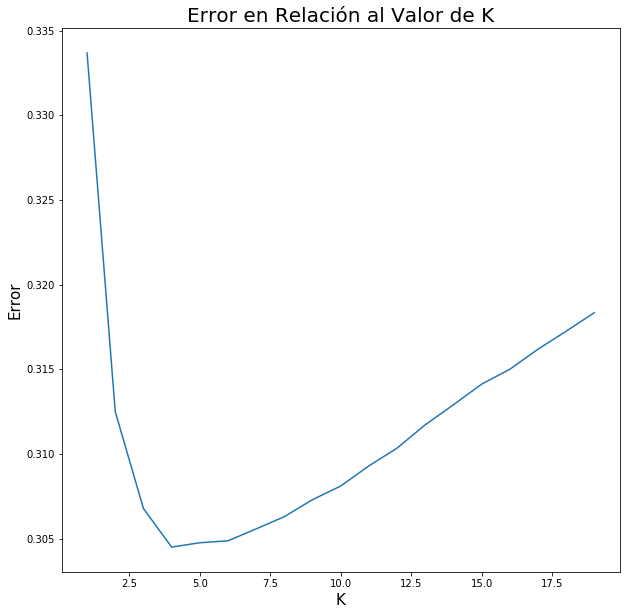

In [76]:
#Ploteamos para ver una mejor representacion
plt.subplots(figsize=(10,10))
plt.plot(rango_k,metricas)
plt.title("Error en Relación al Valor de K",fontsize=20)
plt.xlabel("K",fontsize=15)
plt.ylabel("Error",fontsize=15)

In [63]:
knn = KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree',metric='manhattan')

In [64]:
knn.fit(datos_train,precio_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [65]:
prediccion_knn=knn.predict(test_final)

In [66]:
entregable_knn=IDS[['id']].copy()
entregable_knn['target']=prediccion_knn
entregable_knn.set_index('id',inplace=True)
entregable_knn['target']=np.exp(entregable_knn['target'])
entregable_knn.head()

,target
id,
4941,6.364616e+06
51775,1.157719e+06
115253,2.461023e+06
299321,1.320656e+06
173570,5.161149e+05


In [67]:
entregable_knn.to_csv('KNN_15.csv')

### 2.3) Ada Boosting

In [69]:
#Busco el valor de K que nos de el menor error
rango_learning = range(1, 20)
metricas_learning=[]

for learn in rango_learning:
    ada = AdaBoostRegressor(n_estimators=450,learning_rate=learn,loss='exponential')
    ada.fit(datos_train,precio_train)
    prediccion_ada_validacion=ada.predict(datos_test)
    error=mean_absolute_error(precio_test,prediccion_ada_validacion)

    print('Learning Rate=',learn,'- Mean Absolute Error: ',error)
    metricas_learning.append(error)

Learning Rate= 1 - Mean Absolute Error:  0.5112595822526583
Learning Rate= 2 - Mean Absolute Error:  0.5655877679782437
Learning Rate= 3 - Mean Absolute Error:  0.5957880340048102
Learning Rate= 4 - Mean Absolute Error:  0.5864619564846099
Learning Rate= 5 - Mean Absolute Error:  0.5675209061515097
Learning Rate= 6 - Mean Absolute Error:  0.531782847226017
Learning Rate= 7 - Mean Absolute Error:  0.5813359682357623
Learning Rate= 8 - Mean Absolute Error:  0.6321464408124627
Learning Rate= 9 - Mean Absolute Error:  0.6417780945467975
Learning Rate= 10 - Mean Absolute Error:  0.6805696470649225
Learning Rate= 11 - Mean Absolute Error:  0.6754621106209083
Learning Rate= 12 - Mean Absolute Error:  0.671255482678885
Learning Rate= 13 - Mean Absolute Error:  0.7635133647775525
Learning Rate= 14 - Mean Absolute Error:  0.6734015714185836
Learning Rate= 15 - Mean Absolute Error:  0.77451671549459
Learning Rate= 16 - Mean Absolute Error:  0.7130764855284052
Learning Rate= 17 - Mean Absolute Err

Text(0,0.5,'Error')

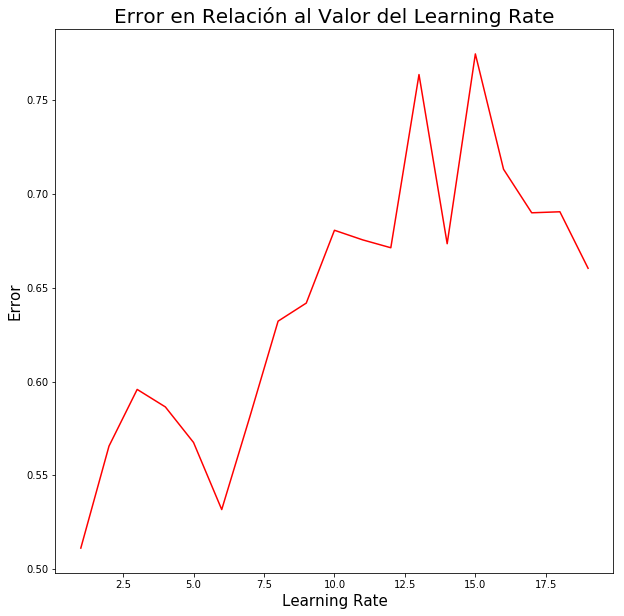

In [70]:
#Ploteamos para ver una mejor representacion
plt.subplots(figsize=(10,10))
plt.plot(rango_learning,metricas_learning,color='red')
plt.title("Error en Relación al Valor del Learning Rate",fontsize=20)
plt.xlabel("Learning Rate",fontsize=15)
plt.ylabel("Error",fontsize=15)

In [61]:
ada = AdaBoostRegressor(n_estimators=450,learning_rate=1,loss='exponential')

In [62]:
ada.fit(datos_train,precio_train)

AdaBoostRegressor(base_estimator=None, learning_rate=2, loss='exponential',
                  n_estimators=450, random_state=None)

In [64]:
prediccion_ada=ada.predict(test_final)

In [71]:
entregable_ada=IDS[['id']].copy()
entregable_ada['target']=prediccion_ada
entregable_ada.set_index('id',inplace=True)
entregable_ada['target']=np.exp(entregable_ada['target'])
entregable_ada.head()

,target
id,
4941,2.381680e+06
51775,1.520188e+06
115253,2.106204e+06
299321,1.851274e+06
173570,1.504128e+06


In [72]:
entregable_ada.to_csv('ADA_02.csv')

### 2.4) Ridge

In [78]:
#Busco el valor de K que nos de el menor error
rango_alpha_rigde = range(1, 100)
metricas_alpha_rigde=[]

for a_rigde in rango_alpha:
    ridge = Ridge(alpha=a_rigde,fit_intercept=True,normalize=True,solver='svd')
    ridge.fit(datos_train,precio_train)
    prediccion_ridge_validacion=ridge.predict(datos_test)
    error=mean_absolute_error(precio_test,prediccion_ridge_validacion)

    print('Alpha=',a_rigde,'- Mean Absolute Error: ',error)
    metricas_alpha_rigde.append(error)

Alpha= 1 - Mean Absolute Error:  0.33408332886338393
Alpha= 2 - Mean Absolute Error:  0.3354529918867206
Alpha= 3 - Mean Absolute Error:  0.3363011433399313
Alpha= 4 - Mean Absolute Error:  0.3368638924786578
Alpha= 5 - Mean Absolute Error:  0.3372630815891917
Alpha= 6 - Mean Absolute Error:  0.33755963645661186
Alpha= 7 - Mean Absolute Error:  0.3377885943335758
Alpha= 8 - Mean Absolute Error:  0.3379708582787864
Alpha= 9 - Mean Absolute Error:  0.33811929981494854
Alpha= 10 - Mean Absolute Error:  0.33824285599993137
Alpha= 11 - Mean Absolute Error:  0.33834705004876886
Alpha= 12 - Mean Absolute Error:  0.338436479447756
Alpha= 13 - Mean Absolute Error:  0.33851394903132825
Alpha= 14 - Mean Absolute Error:  0.3385816939794232
Alpha= 15 - Mean Absolute Error:  0.3386414208872145
Alpha= 16 - Mean Absolute Error:  0.33869449512842276
Alpha= 17 - Mean Absolute Error:  0.338741862585564
Alpha= 18 - Mean Absolute Error:  0.3387844599926025
Alpha= 19 - Mean Absolute Error:  0.33882298535052

Text(0,0.5,'Error')

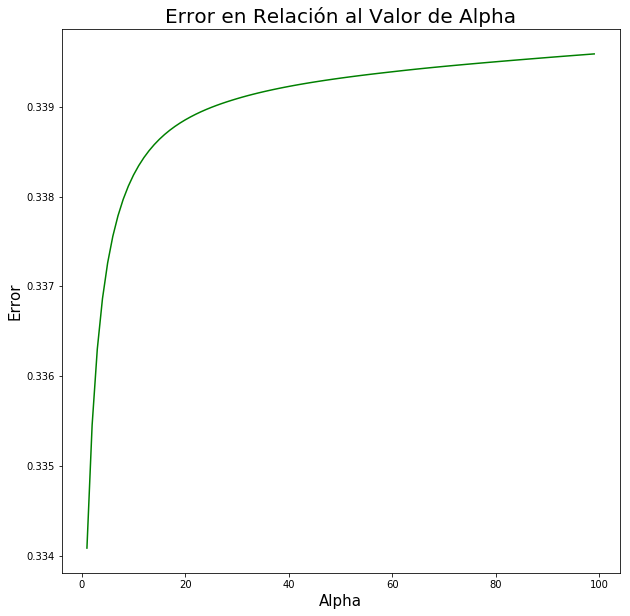

In [79]:
#Ploteamos para ver una mejor representacion
plt.subplots(figsize=(10,10))
plt.plot(rango_alpha_rigde,metricas_alpha_rigde,color='green')
plt.title("Error en Relación al Valor de Alpha",fontsize=20)
plt.xlabel("Alpha",fontsize=15)
plt.ylabel("Error",fontsize=15)

In [67]:
ridge = Ridge(alpha=1,fit_intercept=True,normalize=True,solver='svd')

In [ ]:
ridge.fit(datos_train,precio_train)

In [70]:
prediccion_ridge=ridge.predict(test_final)

In [73]:
entregable_ridge=IDS[['id']].copy()
entregable_ridge['target']=prediccion_ridge
entregable_ridge.set_index('id',inplace=True)
entregable_ridge['target']=np.exp(entregable_ridge['target'])
entregable_ridge.head()

,target
id,
4941,2.593443e+06
51775,1.058884e+06
115253,1.740624e+06
299321,1.383135e+06
173570,1.046005e+06


In [74]:
entregable_ridge.to_csv('RIDGE_02.csv')

### 2.5) Lasso

In [83]:
#Busco el valor de K que nos de el menor error
rango_alpha_lasso = range(1, 100)
metricas_alpha_lasso=[]

for a_lasso in rango_alpha_lasso:
    lasso = Lasso(alpha=a_lasso,fit_intercept=True,normalize=True,positive=True)
    lasso.fit(datos_train,precio_train)
    prediccion_lasso_validacion=lasso.predict(datos_test)
    error=mean_absolute_error(precio_test,prediccion_lasso_validacion)

    print('Alpha=',a_lasso,'- Mean Absolute Error: ',error)
    metricas_alpha_lasso.append(error)

Alpha= 1 - Mean Absolute Error:  0.7062908023883718
Alpha= 2 - Mean Absolute Error:  0.7062908023883718
Alpha= 3 - Mean Absolute Error:  0.7062908023883718
Alpha= 4 - Mean Absolute Error:  0.7062908023883718
Alpha= 5 - Mean Absolute Error:  0.7062908023883718
Alpha= 6 - Mean Absolute Error:  0.7062908023883718
Alpha= 7 - Mean Absolute Error:  0.7062908023883718
Alpha= 8 - Mean Absolute Error:  0.7062908023883718
Alpha= 9 - Mean Absolute Error:  0.7062908023883718
Alpha= 10 - Mean Absolute Error:  0.7062908023883718
Alpha= 11 - Mean Absolute Error:  0.7062908023883718
Alpha= 12 - Mean Absolute Error:  0.7062908023883718
Alpha= 13 - Mean Absolute Error:  0.7062908023883718
Alpha= 14 - Mean Absolute Error:  0.7062908023883718
Alpha= 15 - Mean Absolute Error:  0.7062908023883718
Alpha= 16 - Mean Absolute Error:  0.7062908023883718
Alpha= 17 - Mean Absolute Error:  0.7062908023883718
Alpha= 18 - Mean Absolute Error:  0.7062908023883718
Alpha= 19 - Mean Absolute Error:  0.7062908023883718
Al

Text(0,0.5,'Error')

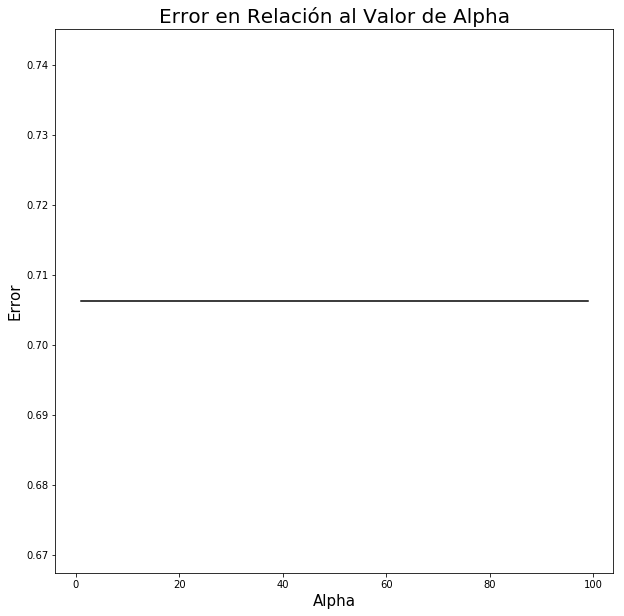

In [84]:
#Ploteamos para ver una mejor representacion
plt.subplots(figsize=(10,10))
plt.plot(rango_alpha_lasso,metricas_alpha_lasso,color='black')
plt.title("Error en Relación al Valor de Alpha",fontsize=20)
plt.xlabel("Alpha",fontsize=15)
plt.ylabel("Error",fontsize=15)

In [55]:
lasso = Lasso(alpha=1,positive=True)

In [56]:
lasso.fit(datos_train,precio_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=True, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [57]:
prediccion_lasso=lasso.predict(test_final)

In [58]:
entregable_lasso=IDS[['id']].copy()
entregable_lasso['target']=prediccion_lasso
entregable_lasso.set_index('id',inplace=True)
entregable_lasso['target']=np.exp(entregable_lasso['target'])
entregable_lasso.head()

,target
id,
4941,6.882491e+06
51775,8.168242e+05
115253,1.502131e+06
299321,1.109289e+06
173570,5.965839e+05


In [59]:
entregable_lasso.to_csv('LASSO_02.csv')

### 2.6) Bagging

#### 2.6.1) KNN

In [55]:
bagging_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=6,algorithm='kd_tree',metric='manhattan'))

In [56]:
bagging_knn.fit(datos_train,precio_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='kd_tree',
                                                    leaf_size=30,
                                                    metric='manhattan',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=6,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [57]:
prediccion_bagging_knn_validacion=bagging_knn.predict(datos_test)
error=mean_absolute_error(precio_test,prediccion_bagging_knn_validacion)

print('Mean Absolute Error: ',error)

Mean Absolute Error:  0.3021357486216176


In [58]:
prediccion_bagging_knn=bagging_knn.predict(test_final)

In [59]:
entregable_bagging_knn=IDS[['id']].copy()
entregable_bagging_knn['target']=prediccion_bagging_knn
entregable_bagging_knn.set_index('id',inplace=True)
entregable_bagging_knn['target']=np.exp(entregable_bagging_knn['target'])
entregable_bagging_knn.head()

,target
id,
4941,6.131421e+06
51775,1.223425e+06
115253,2.331676e+06
299321,1.284736e+06
173570,6.667750e+05


In [60]:
entregable_bagging_knn.to_csv('BAGGING_KNN_01.csv')

#### 2.6.2) Random Forest

In [55]:
bagging_random = BaggingRegressor(RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=450,bootstrap=True,criterion='mse'))

In [56]:
bagging_random.fit(datos_train,precio_train)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=450,
                                                      n_jobs=-1,
                                                      oob_score=False,
                                      

In [57]:
prediccion_bagging_random_validacion=bagging_random.predict(datos_test)
error=mean_absolute_error(precio_test,prediccion_bagging_random_validacion)
#error=np.exp(error)

print('Mean Absolute Error: ',error)

Mean Absolute Error:  0.23549416944823853


In [58]:
prediccion_bagging_random=bagging_random.predict(test_final)

In [59]:
entregable_bagging_random=IDS[['id']].copy()
entregable_bagging_random['target']=prediccion_bagging_random
entregable_bagging_random.set_index('id',inplace=True)
entregable_bagging_random['target']=np.exp(entregable_bagging_random['target'])
entregable_bagging_random.head()

,target
id,
4941,3.590455e+06
51775,1.100291e+06
115253,2.379708e+06
299321,1.246374e+06
173570,6.175388e+05


In [60]:
entregable_bagging_random.to_csv('BAGGING_RANDOM_01.csv')

### 2.7) Extra Tree Regressor

In [123]:
extra_tree = ExtraTreesRegressor(n_estimators=450,criterion='mse',bootstrap=True,n_jobs=-1)

In [124]:
extra_tree.fit(datos_train,precio_train)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=-1,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [125]:
prediccion_extra_tree_validacion=extra_tree.predict(datos_test)
error=mean_absolute_error(precio_test,prediccion_extra_tree_validacion)

print('Mean Absolute Error: ',error)

Mean Absolute Error:  529747.3275924053


In [126]:
prediccion_extra_tree=extra_tree.predict(test_final)

In [127]:
entregable_extra_tree=IDS[['id']].copy()
entregable_extra_tree['target']=prediccion_extra_tree
entregable_extra_tree.set_index('id',inplace=True)
entregable_extra_tree['target']=entregable_extra_tree['target'].round()
entregable_extra_tree.head()

,target
id,
4941,2786644.0
51775,571034.0
115253,1304591.0
299321,1126496.0
173570,617622.0


In [128]:
entregable_extra_tree.to_csv('EXTRA_TREE_07.csv')

### 2.8) XGBoosting

In [76]:
xgboost = xgb.XGBRegressor(objective ='reg:squaredlogerror', n_estimators = 350, max_depth=5,learning_rate=0.1,gamma=1)

In [77]:
xgboost.fit(datos_train,precio_train)

In [226]:
prediccion_xgboost_validacion=xgboost.predict(datos_test)
error=mean_absolute_error(precio_test,prediccion_xgboost_validacion)

print('Mean Absolute Error: ',error)

Mean Absolute Error:  688021.7892900549


### 2.9) SVR

In [60]:
svr = SVR(kernel='rbf',gamma='scale',C=3,epsilon=0.1)

In [61]:
svr.fit(datos_train,precio_train)

SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
prediccion_svr_validacion=svr.predict(datos_test)
error=mean_absolute_error(precio_test,prediccion_svr_validacion)

print('Mean Absolute Error: ',error)

Mean Absolute Error:  0.5563927916140275


In [63]:
prediccion_svr=svr.predict(test_final)

In [66]:
entregable_svr=IDS[['id']].copy()
entregable_svr['target']=prediccion_svr
entregable_svr.set_index('id',inplace=True)
entregable_svr['target']=np.exp(entregable_svr['target'])
entregable_svr.head()

,target
id,
4941,3.261239e+06
51775,1.325074e+06
115253,2.454055e+06
299321,1.775500e+06
173570,6.106034e+05


In [67]:
entregable_svr.to_csv('SVR_03.csv')

### 2.10) Random Forest

In [58]:
random = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=450,bootstrap=True,max_depth=100,criterion='mse')

In [65]:
random.fit(datos_train,precio_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [66]:
prediccion_random=random.predict(test_final)

In [67]:
entregable_random=IDS[['id']].copy()
entregable_random['target']=prediccion_random
entregable_random.set_index('id',inplace=True)
entregable_random['target']=np.exp(entregable_random['target'])
entregable_random.head()

,target
id,
4941,3.431942e+06
51775,1.043280e+06
115253,2.448545e+06
299321,1.278500e+06
173570,5.879565e+05


In [68]:
entregable_random.to_csv('RANDOM_16.csv')